In [1]:
# Load required libraries
library(readr)
library(ggplot2)

In [2]:
generate_regression <- function(x_values, y_values, order) {
  # Perform regression using lm()
  lm_model <- lm(y_values ~ 
    poly(x_values, order, raw = TRUE))
  
  # Generate values for the regression line
  x_plot <- seq(
    min(x_values), max(x_values),
    length.out = 100)
  y_plot <- predict(
    lm_model,
    newdata = data.frame(x_values = x_plot))
  
  # Return a list containing all relevant objects
  return(list(
    order = order,
    x_values = x_values,
    y_values = y_values,
    lm_model = lm_model,
    x_plot = x_plot,
    y_plot = y_plot
  ))
}

In [3]:
show_coeff <- function(regression_data) {
  order    <- regression_data$order
  lm_model <- regression_data$lm_model

  # Define a named vector
  # to map order numbers to curve types
  coeff_text <- c(
    "(a, b)" = 1, "(a, b, c)" = 2, "(a, b, c, d)" = 3)
  order_text <- c(
    "Linear" = 1, "Quadratic" = 2, "Cubic" = 3)

  # Print the curve type
  cat(paste("Using lm_model :",
    names(order_text)[order], "\n"))

  # Coefficients
  coefficients <- coef(lm_model)

  # Reverse order to match output
  coefficients <- coefficients[
    length(coefficients):1]

  # Print coefficients
  cat("Coefficients ",
    names(coeff_text)[order], ":\n\t",
    coefficients, "\n")
}

In [4]:
create_plot <- function(
    regression_data, title, label) {

  x_values <- regression_data$x_values
  y_values <- regression_data$y_values
  x_plot   <- regression_data$x_plot
  y_plot   <- regression_data$y_plot

  # Create data frame for ggplot2
  data <- data.frame(x = x_values, y = y_values)

  # Create breaks and values vectors
  breaks <- c("Data Points", "Regression")
  values <- c("Data Points" = "red", "Regression" = "black")

  # Plot using ggplot2
  ggplot(data, aes(x = x, y = y)) +
    geom_point(aes(color="Data Points"), size = 0.5) +
    geom_line(
      data = data.frame(x = x_plot, y = y_plot),
      aes(x, y, color = "Regression"), linewidth = 0.2) +
    labs(
      x = "x", y = "y", title = title) +
    theme_minimal() +
    theme(legend.position = "right",
        text = element_text(size = 8)) +
    scale_color_manual(
      name = "Plot",
      breaks = breaks,
      values = values) +
    guides(
      color = guide_legend(
        override.aes = list(
          shape = c(16, NA), linetype = c(0, 1)
      )))
}

In [5]:
# Read data from CSV file
series <- read_csv(
  "series.csv",
  show_col_types = FALSE)

In [6]:
# Call the function and get regression line data
regress_1 <- generate_regression(
  series$xs, series$ys1, 1)
regress_2 <- generate_regression(
  series$xs, series$ys2, 2)
regress_3 <- generate_regression(
  series$xs, series$ys3, 3)

Using lm_model : Linear 
Coefficients  (a, b) :
	 4 5 


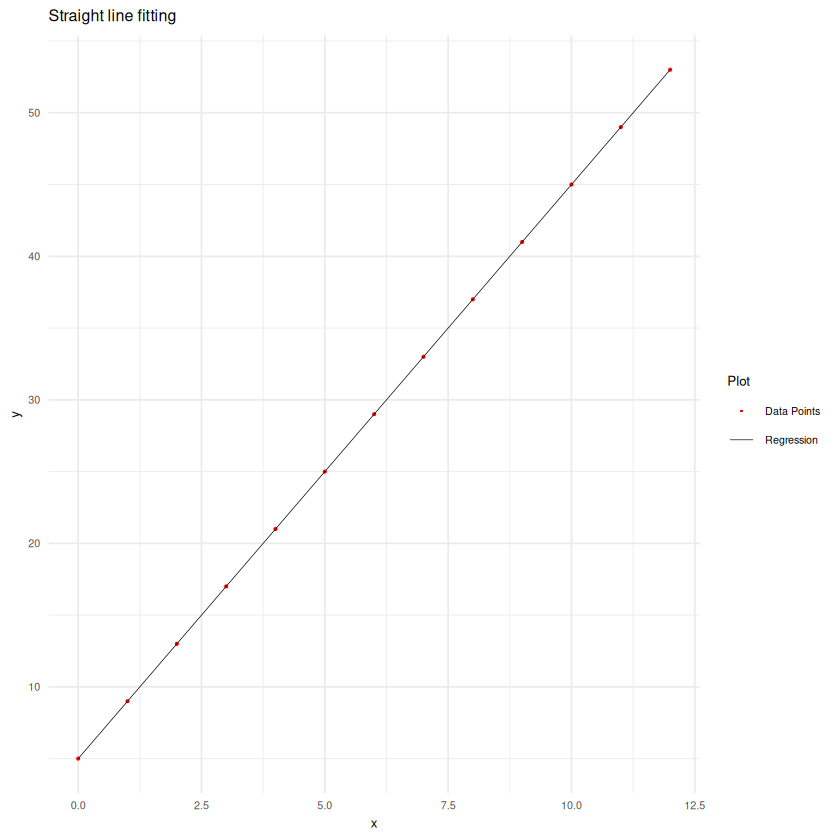

In [7]:
# Perform linear regression and plot
show_coeff(regress_1)
create_plot(regress_1,
  "Straight line fitting",
  "Linear Equation")

Using lm_model : Quadratic 
Coefficients  (a, b, c) :
	 3 4 5 


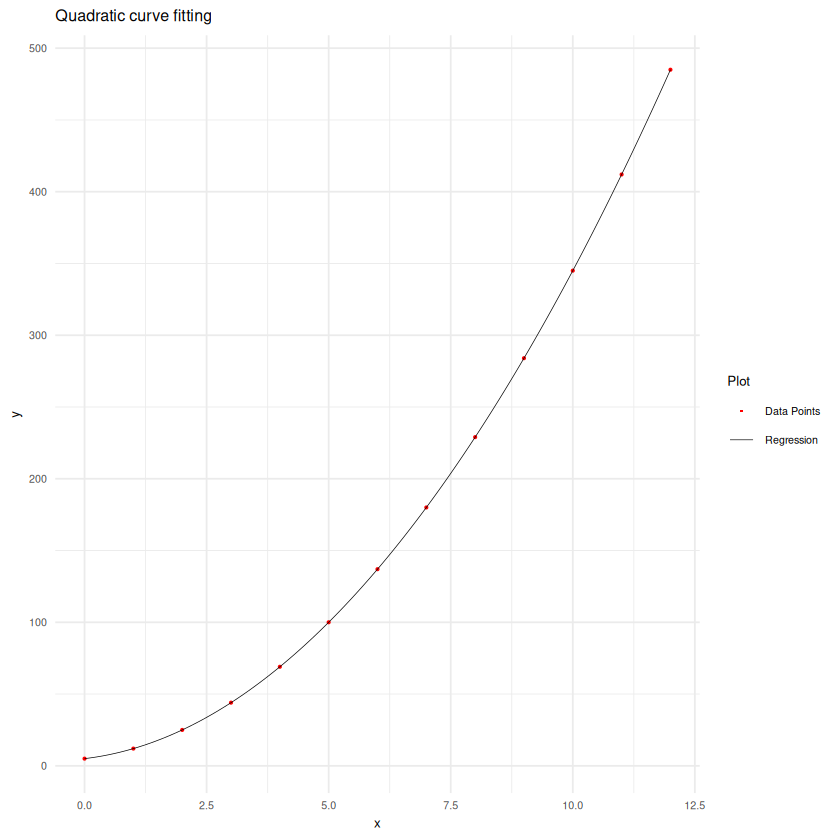

In [8]:
# Perform quadratic regression and plot
show_coeff(regress_2)
create_plot(regress_2,
  "Quadratic curve fitting",
  "Quadratic Curve")

Using lm_model : Cubic 
Coefficients  (a, b, c, d) :
	 2 3 4 5 


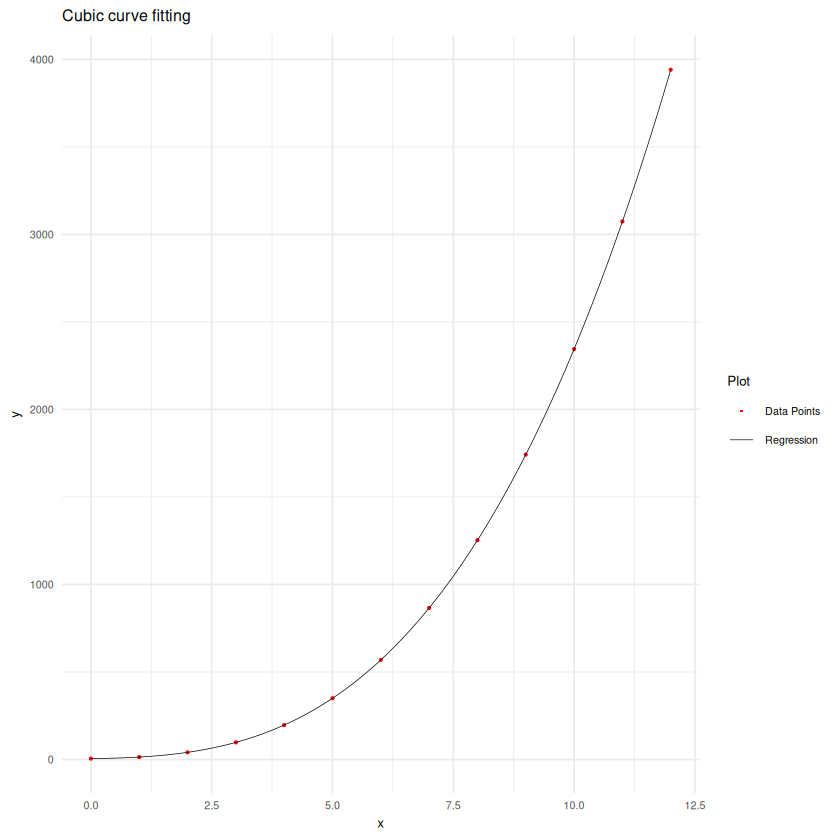

In [9]:
# Perform cubic regression and plot
show_coeff(regress_3)
create_plot(regress_3,
  "Cubic curve fitting",
  "Cubic Curve")